In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt # Ve bieu do
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 100) # display toi da 100 cot

In [3]:
# Su dung style whitegrid
plt.style.use('seaborn-whitegrid') 

# Overview
- This Data is about housing price in districs in California
- Observational units: districs
- Real estate agent

In [4]:
# Load data
df = pd.read_csv("data/housing.csv")

In [5]:
# Inspect
df.shape

(20640, 10)

In [6]:
# First row
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [7]:
# Overview info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Missing value (null)
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Percentage of null available
df.isnull().mean() *100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [10]:
# Categorical investigation
df["ocean_proximity"].value_counts(normalize = True) *100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

# Exploratory Data Analysis (EDA)

In [11]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


## Investigate numeric varaiables
- Histogram/KDE
- Boxplot
- Scatter plot

In [12]:
# Numeric
df_num = df.select_dtypes("number").copy()
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [13]:
df_num.shape

(20640, 9)

In [14]:
df_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

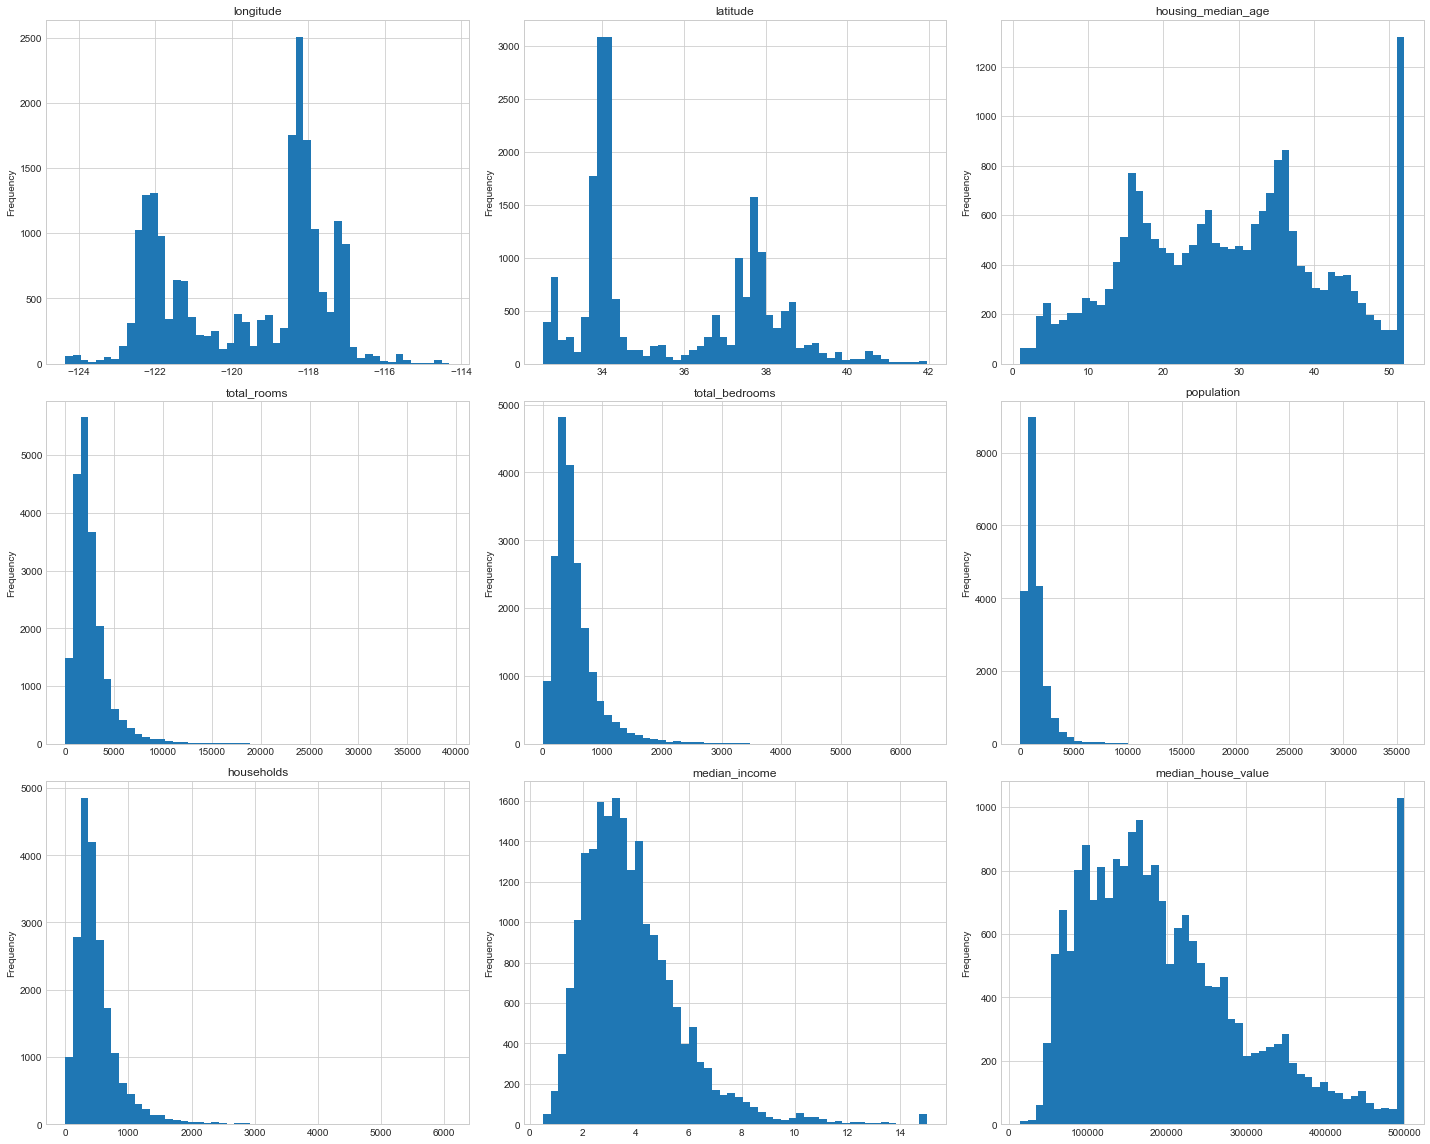

In [15]:
# Init
fig = plt.figure(figsize = (20,16))

ncols = 3
nrows = int(np.ceil(df_num.shape[1]/ncols)) # np.ceil return smallest integer not < ( divide ) and convert to int

# Plot the Data
for index, value in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, index + 1) # Index + 1 la number/so luong of subplot can phai bieu dien
    df_num[value].plot.hist(bins = 50, ax=ax)
    
# Decorate
    ax.set_title(value)


plt.tight_layout()
plt.show()

* `housing_median_age` , `median_house_value` có vẻ bị capped ở bên phải (peak at the end)

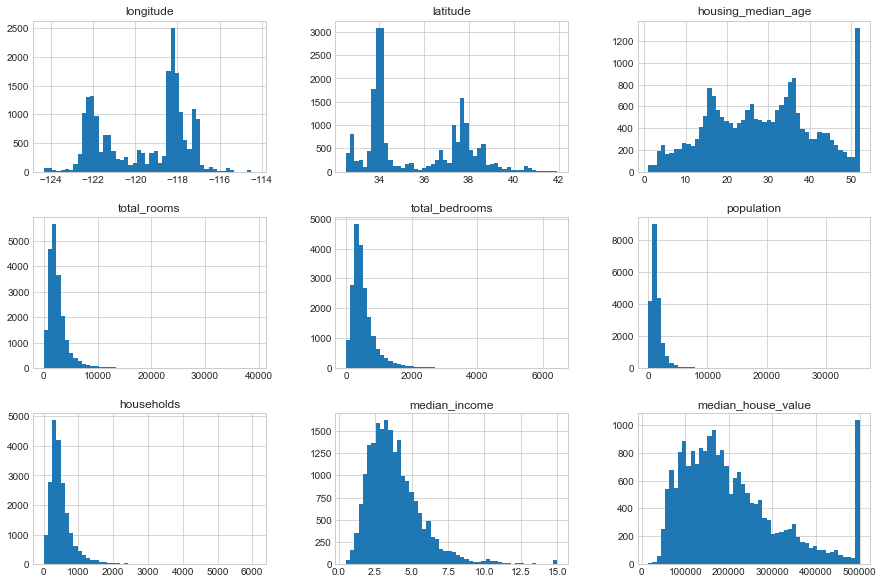

In [16]:
plt.rcParams["figure.figsize"] = (15, 10)
df_num.hist(bins = 50)
plt.show()

# Plot Satter Plots
### Ver 1

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


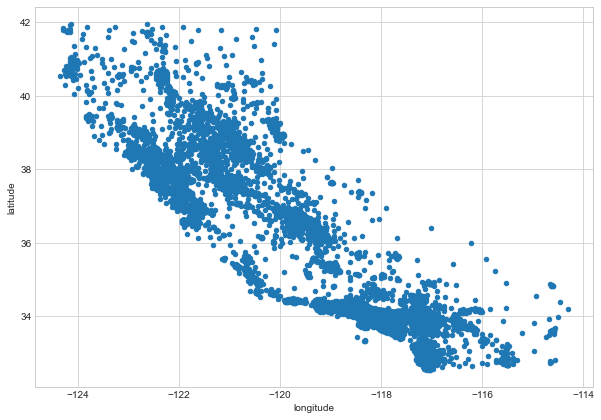

In [18]:
fig, ax = plt.subplots(figsize = (10, 7))
df.plot.scatter(x="longitude", y="latitude", ax = ax)
plt.show()

### Ver 2
#### Set alpha de giam density

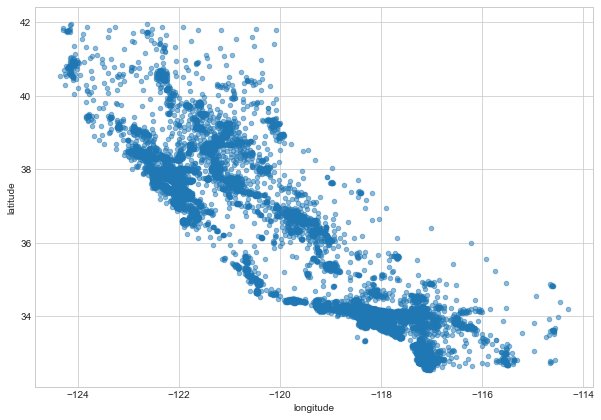

In [19]:
fig, ax = plt.subplots(figsize = (10, 7))
df.plot.scatter(
    x="longitude",
    y="latitude",
    alpha = 0.5, # set alpha de giam mat do (density)
    ax=ax
)
plt.show() 

### Ver 3
#### The hien population qua size

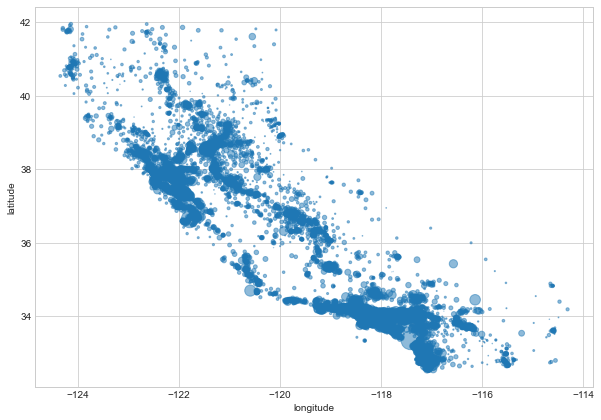

In [20]:
fig, ax = plt.subplots(figsize = (10, 7))

df.plot.scatter(
    x="longitude",
    y="latitude",
    alpha = 0.5,
    s=df["population"] / 100, # s: markersize^2, 
    # df['population]/ 100 = size
    ax=ax
)

plt.show()

### Ver 4
#### Them color de the hien Housing Price

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


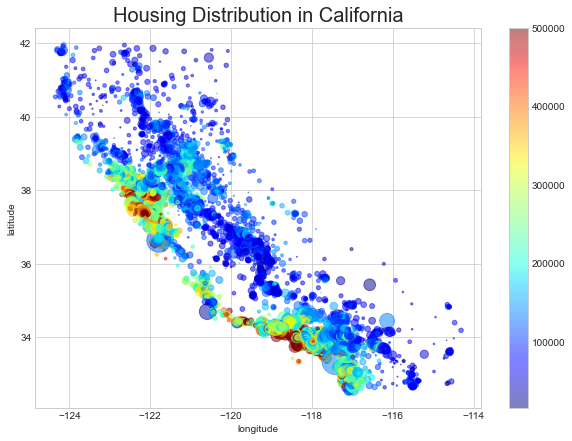

In [22]:
fig, ax = plt.subplots(figsize = (10,7))

df.plot.scatter(
    x='longitude',
    y='latitude',
    alpha = 0.5,
    s= df['population'] / 50,
    c= df['median_house_value'], # c= color 
    cmap= plt.get_cmap("jet"), # "jet" = thu vien mau sac co san, cmap = color map
    ax = ax
)

ax.set_title('Housing Distribution in California', fontsize = 20) 

plt.show()

* Note:

    Gia nha co lien quan chat che voi vi tri gan bien hay khong ?
     - Dong dan co xu huong gia cao hon
     - Gan bien co xu huong gia cao hon

# Scatter plot of other variables with house values 

In [23]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [24]:
cols = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'median_income',
    'median_house_value',
]

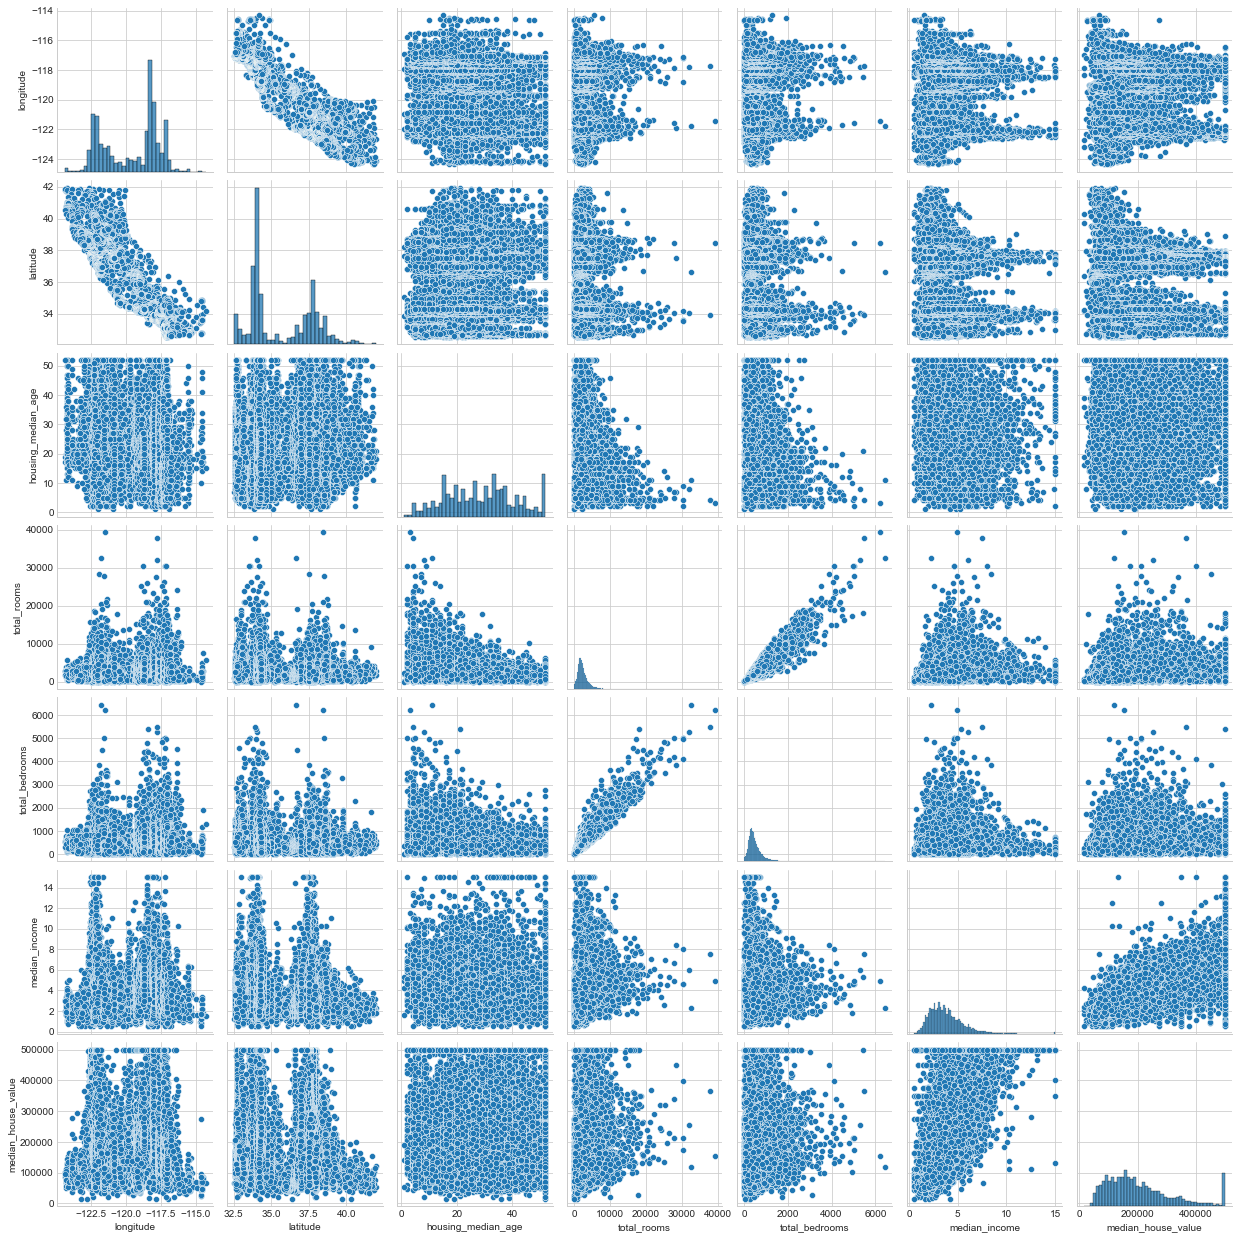

In [25]:
sns.pairplot(df[cols]) # Để vẽ nhiều bản phân phối hai chiều theo cặp trong tập dữ liệu, bạn có thể sử dụng hàm .pairplot().
plt.show()

Remark
   + `median_income`, `total_rooms`, `total_bedrooms` duong nhu la yeu to tot de du doan gia nha o
   + `total_rooms` & `total_bedrooms` co tuong quan chat che

# Zoom in median_income vs median_house_value

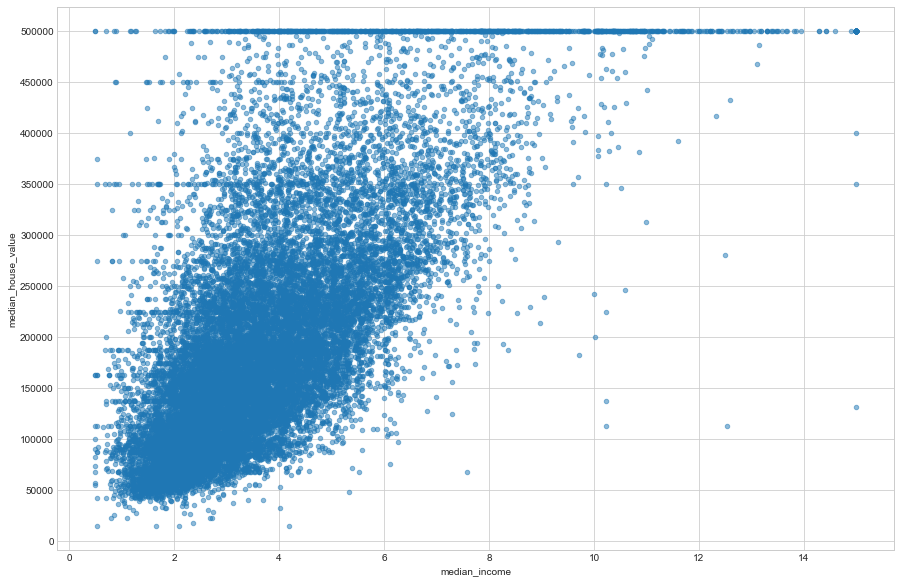

In [26]:
fig, ax = plt.subplots()

df.plot.scatter(
    x='median_income',
    y='median_house_value',
    alpha = 0.5,
    ax=ax
)

max_prices = df['median_house_value'].max()
yticks = np.arange(0, max_prices, 50000) # mỗi gía trị ở cột y cách nhau 50000 
ax.set_yticks(yticks)

plt.show()

Remarks:  
* Data capped at 500.000
* Solution:
    + Remove those points
    + Or research and obtain the accurate price


## Correlation

In [27]:
df.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [28]:
df.corr()['median_house_value'].abs().sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

## Derive Features

1. Bedrooms per rooms
2. Rooms per households
3. Population per households

In [29]:
df['bedrooms_per_household'] = df['total_bedrooms'] / df['total_rooms']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['poputation_per_household'] = df['population'] / df['households']                           

In [30]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_household,rooms_per_household,poputation_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260


In [31]:
df.corr()['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049686
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
bedrooms_per_household     -0.255880
rooms_per_household         0.151948
poputation_per_household   -0.023737
Name: median_house_value, dtype: float64

In [32]:
df.corr()['median_house_value'].abs().sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
bedrooms_per_household      0.255880
rooms_per_household         0.151948
latitude                    0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
longitude                   0.045967
population                  0.024650
poputation_per_household    0.023737
Name: median_house_value, dtype: float64

Remark
* `bedrooms_per_household` and `rooms_per_household` have better correlation with `median_housing_value` than`total_rooms` và `total_bedrooms`

## Investigate null Data

In [33]:
df.isnull().mean()

longitude                   0.000000
latitude                    0.000000
housing_median_age          0.000000
total_rooms                 0.000000
total_bedrooms              0.010029
population                  0.000000
households                  0.000000
median_income               0.000000
median_house_value          0.000000
ocean_proximity             0.000000
bedrooms_per_household      0.010029
rooms_per_household         0.000000
poputation_per_household    0.000000
dtype: float64

In [34]:
null_data = df.loc[df['total_bedrooms'].isnull() == True, :].copy()

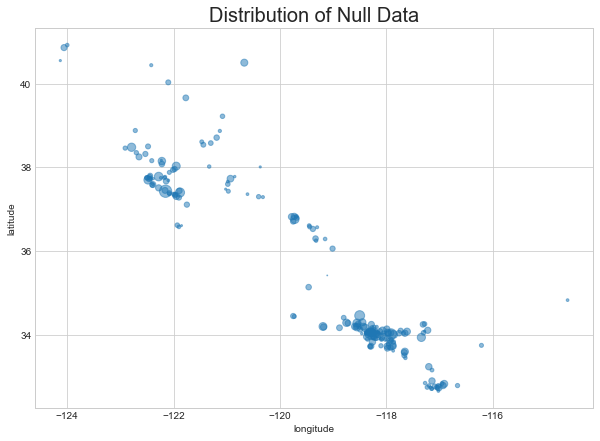

In [35]:
fig, ax = plt.subplots(figsize = (10,7))

null_data.plot.scatter(
    x='longitude',
    y='latitude',
    alpha = 0.5,
    s= null_data["population"] / 50, #size
    ax=ax
)

ax.set_title("Distribution of Null Data", fontsize = 20)

plt.show()

Remark
+ NO clear pattern

# Preprocess Data to train Model

In [36]:
# Read Data
df = pd.read_csv("data/housing.csv")

In [37]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [38]:
# Check null
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [39]:
# Remove null
df.dropna(how = "any", inplace = True)

In [40]:
# CHeck Null after remove 
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## One hot encoding `ocean_proximity`

In [41]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [42]:
# Example of pd.get_dummies()
import pandas as pd

con = pd.Series(list('abcba'))
pd.get_dummies(con)


,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


In [43]:
ocean_data = pd.get_dummies(df['ocean_proximity'])
ocean_data.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [44]:
ocean_data = pd.get_dummies(df['ocean_proximity'], drop_first = True) # drop_first bo di cot dau tien <1H Ocean
ocean_data.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [45]:
# Combine with original Data
df = df.join(ocean_data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


In [46]:
df.drop(columns = ['ocean_proximity'], inplace = True) # Inplace= False trả về bản copy, còn = True thì thực hiện và trả về None ở cột mà mình đã drop
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [47]:
# Double check
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

In [48]:
# Make sure ther is no non-numberic columns
df.select_dtypes("O").columns.tolist()

[]

In [49]:
# Add features
df['bedrooms_per_household'] = df['total_bedrooms'] / df['total_rooms']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['poputation_per_household'] = df['population'] / df['households']   

In [50]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_household,rooms_per_household,poputation_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,0.129516,8.288136,2.802260


# Modeling 

### Split Train Test

* Split input (X) and target (Y)

In [51]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_household,rooms_per_household,poputation_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,0.155797,6.238137,2.109842


In [52]:
# Get features => bỏ đi cột median_house_value
# Exclude label
X = df.drop(columns=['median_house_value']).copy()
X.shape

(20433, 15)

In [53]:
X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_household,rooms_per_household,poputation_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0,0.129516,8.288136,2.802260


In [54]:
# Get label: lấy cột median_house_value đã bị bỏ ở trên
y = df['median_house_value']

In [55]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### Split Train, Test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 1
)

In [58]:
# Double check size
print(X_train.shape)
print(X_test.shape)

(15324, 15)
(5109, 15)


### Train Model

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
# Initiate model
model_1 = LinearRegression()

In [61]:
# Train: fit data to the model to learn the parameter
model_1.fit(X_train, y_train) # Inplace

LinearRegression()

### View the trained model

In [62]:
model_1.intercept_ # the intercept (often labeled the constant) is the "expected mean value of Y" when all X=0

-2471543.2158825197

In [63]:
# Coefficient
model_1.coef_

array([-2.81366749e+04, -2.66744945e+04,  1.08013950e+03,  1.31670628e+00,
        1.53942179e+01, -3.87207335e+01,  1.03943834e+02,  4.09908119e+04,
       -3.42935300e+04,  1.38297215e+05, -3.07716603e+03,  4.49891289e+03,
        2.72566949e+05,  3.49849195e+03,  4.72397993e+01])

In [64]:
len(model_1.coef_)

15

* `housing_price` = -2471543.2158825197 + -2.81366749e+04 * longtitude + -2.66744945e+04 * latitude + ... + 4.72397993e+01 x15

### Make prediction using trained model

In [65]:
# Predict
y_pre_1 = model_1.predict(X_test)

In [66]:
X_test.shape

(5109, 15)

In [67]:
# Preview first 5 prediction
y_pre_1[:5].tolist()

[382829.1247601141,
 275008.6987852282,
 154075.76898950944,
 358141.78210927406,
 53024.65269857552]

In [68]:
# Compare with actual label 
y_test[:5].tolist()

[360900.0, 291500.0, 131300.0, 500001.0, 118800.0]

# Evaluate the model 

## Model 0: AVG Price

* Best guess without building model is Average Price

RMSE - Root mean square error

### Caculate manually

In [69]:
y_train.mean() #Best guess

206489.63697468024

In [70]:
# AVG model RMSE
y_pred_0 = np.full(y_test.shape, y_train.mean())
y_pred_0

array([206489.63697468, 206489.63697468, 206489.63697468, ...,
       206489.63697468, 206489.63697468, 206489.63697468])

In [71]:
residual_0 = y_test - y_pred_0
residual_0[:10]

6715     154410.363025
4121      85010.363025
15433    -75189.636975
20272    293511.363025
11843    -87689.636975
1398     -16889.636975
1838     -43989.636975
1902     -71789.636975
18586    -14289.636975
11765    -27089.636975
Name: median_house_value, dtype: float64

In [72]:
# RMSE 
np.sqrt(sum(residual_0**2/ y_test.shape[0]))

117054.03869773229

## Calculate RMSE using sklearn

In [73]:
from sklearn.metrics import mean_squared_error # import rmse calculate

In [74]:
# for model 0
np.sqrt(mean_squared_error(y_test, y_pred_0))

117054.03869773263

In [75]:
print(residual_0.abs().mean())
print(residual_0.abs().std())

92090.95961121324
72262.88976047133


# Model 1: Linear regression

In [76]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pre_1))

67819.28235577882

* better than model 0

In [77]:
y_pre_1 = model_1.predict(X_test)
residual_1 = y_test - y_pre_1

In [78]:
# Residual
print(residual_1.abs().mean())
print(residual_1.abs().std())

48932.68832184288
46962.52503718697


## Plot

In [79]:
y_pred_0

array([206489.63697468, 206489.63697468, 206489.63697468, ...,
       206489.63697468, 206489.63697468, 206489.63697468])

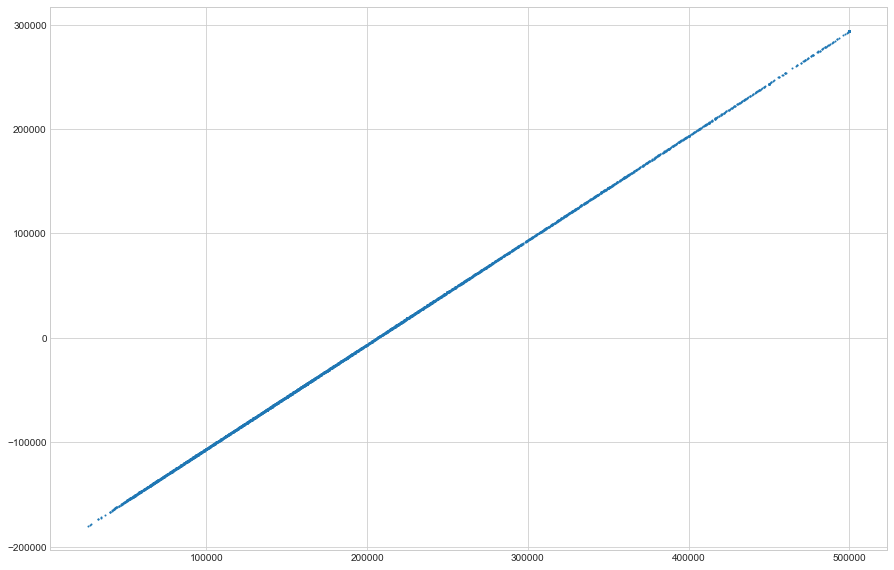

In [80]:
# Model 0
fig, ax = plt.subplots()
ax.scatter(y_test, residual_0, s=1)
plt.show()

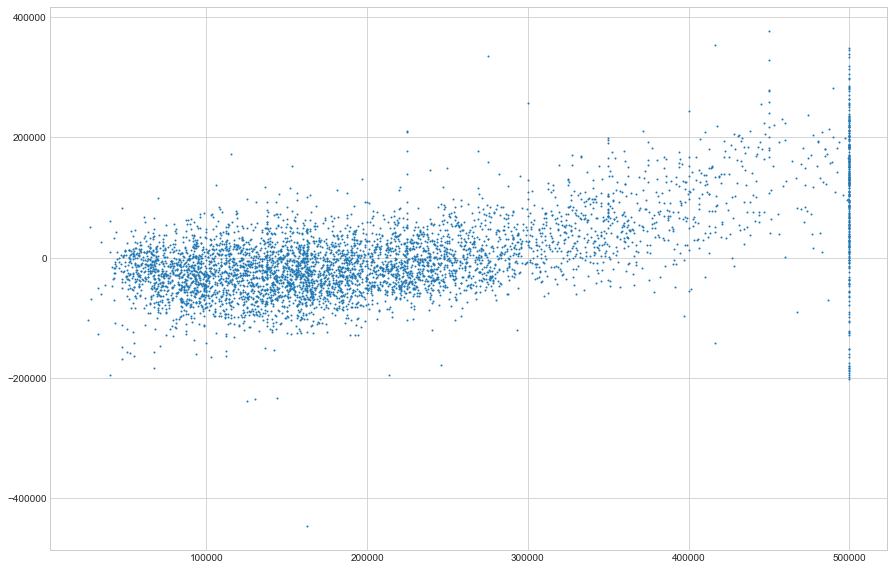

In [81]:
# Residual 1
fig, ax = plt.subplots()
ax.scatter(y_test, residual_1, s=1)
plt.show()

# Try another model

In [82]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

In [83]:
# Init and fit model_1
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [84]:
model_1.predict(X_test)

array([382829.12476011, 275008.69878523, 154075.76898951, ...,
       240287.83504297, 165926.86314871, 214294.64253093])

In [85]:
# Init and fit model 2
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
# Predict using RandomForest
y_pred_2 = model_2.predict(X_test)

In [87]:
# Residual of model 2
residual_2 = y_test - y_pred_2

In [88]:
# Model 1 RMSE (linearRegression)
np.sqrt(mean_squared_error(y_test, y_pre_1))

67819.28235577882

In [89]:
# Model 2 RMSE (RegressionForest)
np.sqrt(mean_squared_error(y_test, y_pred_2))

49962.33776412239

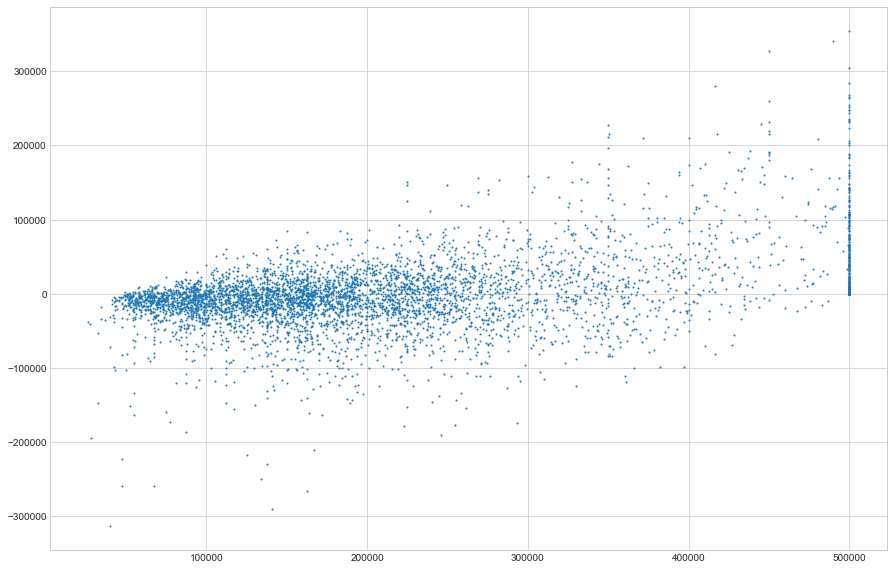

In [90]:
# Residual 
fig, ax = plt.subplots()
ax.scatter(y_test, residual_2, s=1)
plt.show()

* Step to build model
    - Load, inspect
    - EDA
    - Clean, preprocess before model building (check for null, NA data, etc)
    - Modeling:
        + Select a model: LinearRegression, RegressionForest, etc
        + Split train, test
        + Fit
        + Make decesion
        + Evaluate: RMSE
        + Pick
     - Linear algebra
     - Calculus(I, II, III) differential equation
     - Probalility and stat
     